In [1]:
import sys
sys.path.insert(0, '/Users/ml1000278614/Documents/PythonProjects/stockTrader_NEAT')

In [55]:
from DataBase import DatabaseConfig, StockDataHandler
import matplotlib.pyplot as plt

In [3]:
table_name = 'stock_data'
connection_str = 'sqlite:///db/neat_stock_data.db'
stock_db_config = DatabaseConfig(table_name, connection_str)
stock_db_connection = StockDataHandler(stock_db_config)

df = stock_db_connection.query_ticker('BTC-USD')
print(df)

              Open          High           Low         Close       Volume  \
0      7194.892090   7254.330566   7174.944336   7200.174316  18565664997   
1      7202.551270   7212.155273   6935.270020   6985.470215  20802083465   
2      6984.428711   7413.715332   6914.996094   7344.884277  28111481032   
3      7345.375488   7427.385742   7309.514160   7410.656738  18444271275   
4      7410.451660   7544.497070   7400.535645   7411.317383  19725074095   
...            ...           ...           ...           ...          ...   
1558  68897.109375  70284.429688  68851.632812  69362.554688  21204930369   
1559  69362.554688  72715.359375  69064.242188  71631.359375  37261432669   
1560  71632.500000  71742.507812  68212.921875  69139.015625  36426900409   
1561  69140.242188  71093.429688  67503.562500  70587.882812  38318601774   
1562  70635.023438  71244.460938  69590.742188  70341.195312  33273556992   

       ticker        SMA_20        SMA_50        EMA_20        EMA_50  \
0 

In [40]:
def normalize_data(col):
    rolling_max = col.rolling(window=90, min_periods=30).max()
    rolling_min = col.rolling(window=90, min_periods=30).min()

    normalized_col = (col - rolling_min) / (rolling_max-rolling_min)

    return normalized_col

In [74]:
start_index = 900
run_df = df[start_index:start_index+120]
run_df.drop(columns=['ticker'],inplace=True)
run_df.dropna(inplace=True)
column_names = run_df.columns.tolist()

normalized_df = run_df.apply(normalize_data)
normalized_df.dropna(inplace=True)
normalized_df.reset_index(inplace=True)
normalized_df



/var/folders/rr/0y3zp_rj7jx8n4c2t38_jfq40000gp/T/ipykernel_22781/3877317701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df.drop(columns=['ticker'],inplace=True)
/var/folders/rr/0y3zp_rj7jx8n4c2t38_jfq40000gp/T/ipykernel_22781/3877317701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_df.dropna(inplace=True)


,index,Open,High,Low,Close,Volume,SMA_20,SMA_50,EMA_20,EMA_50,RSI_14,MACD,MACD_Signal,BB_Upper,BB_Middle,BB_Lower,ATR_14,OBV,ADL
0,978,0.077616,0.006128,0.015228,0.040679,0.488905,0.000000,0.805036,0.000000,0.0,0.206627,0.035406,0.000000,0.000000,0.000000,0.141591,0.000000,0.030916,0.116922
1,979,0.042080,0.030293,0.000000,0.000000,1.000000,0.000000,0.725235,0.000000,0.0,0.013746,0.000000,0.000000,0.071557,0.000000,0.000000,0.166549,0.000000,0.000000
2,980,0.000000,0.000000,0.000000,0.081028,0.703304,0.000000,0.635567,0.000000,0.0,0.186545,0.000000,0.000000,0.044324,0.000000,0.000000,0.176445,0.132460,0.116453
3,981,0.080885,0.000000,0.075811,0.088101,0.592636,0.000000,0.550212,0.000000,0.0,0.201375,0.008734,0.000000,0.017818,0.000000,0.000000,0.073837,0.253473,0.195985
4,982,0.087717,0.353616,0.116895,0.455299,1.000000,0.003258,0.511199,0.030739,0.0,0.781829,0.143394,0.022317,0.251989,0.058141,0.000000,0.430689,0.435661,0.428799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1064,0.100646,0.146071,0.140958,0.209820,0.130425,0.001498,0.000000,0.005548,0.0,0.601814,0.298466,0.116296,0.082623,0.048271,0.205099,0.163524,0.144683,0.318584
87,1065,0.210299,0.147093,0.214717,0.179222,0.066003,0.000848,0.000000,0.006148,0.0,0.551323,0.349088,0.155504,0.107385,0.067601,0.210659,0.124420,0.097492,0.272736
88,1066,0.180050,0.130142,0.212967,0.197682,0.033388,0.004145,0.000000,0.009622,0.0,0.585690,0.400392,0.198804,0.131644,0.092358,0.226892,0.073533,0.137766,0.352506
89,1067,0.198476,0.134406,0.214675,0.170276,0.001102,0.010889,0.000000,0.008360,0.0,0.537423,0.433249,0.241085,0.115463,0.118917,0.295884,0.028819,0.104339,0.297974


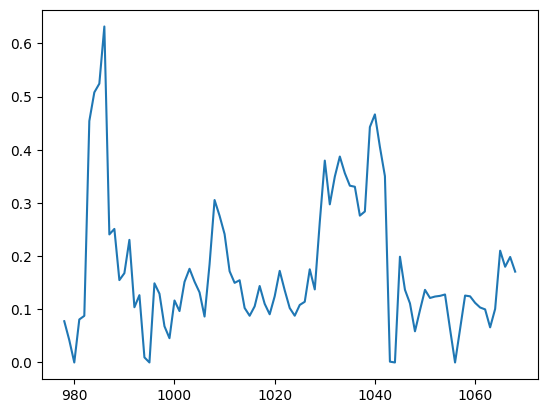

In [61]:
plt.plot(normalized_df['Open'])

In [72]:
normalized_df.iloc[0:5]

,Open,High,Low,Close,Volume,SMA_20,SMA_50,EMA_20,EMA_50,RSI_14,MACD,MACD_Signal,BB_Upper,BB_Middle,BB_Lower,ATR_14,OBV,ADL
978,0.077616,0.006128,0.015228,0.040679,0.488905,0.000000,0.805036,0.000000,0.0,0.206627,0.035406,0.000000,0.000000,0.000000,0.141591,0.000000,0.030916,0.116922
979,0.042080,0.030293,0.000000,0.000000,1.000000,0.000000,0.725235,0.000000,0.0,0.013746,0.000000,0.000000,0.071557,0.000000,0.000000,0.166549,0.000000,0.000000
980,0.000000,0.000000,0.000000,0.081028,0.703304,0.000000,0.635567,0.000000,0.0,0.186545,0.000000,0.000000,0.044324,0.000000,0.000000,0.176445,0.132460,0.116453
981,0.080885,0.000000,0.075811,0.088101,0.592636,0.000000,0.550212,0.000000,0.0,0.201375,0.008734,0.000000,0.017818,0.000000,0.000000,0.073837,0.253473,0.195985
982,0.087717,0.353616,0.116895,0.455299,1.000000,0.003258,0.511199,0.030739,0.0,0.781829,0.143394,0.022317,0.251989,0.058141,0.000000,0.430689,0.435661,0.428799


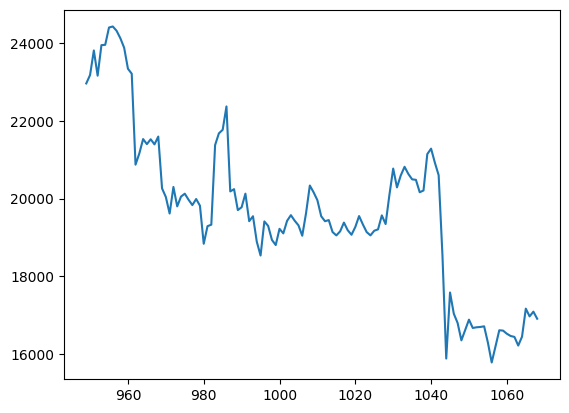

In [62]:
plt.plot(run_df['Open'])

In [75]:
test = 1
signal = 'Buy' if test == 1 else 'Sell'

In [76]:
signal

'Buy'